# STEP #0: IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [6]:
spam_df=pd.read_csv('emails.csv')

In [12]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# STEP #2: VISUALISE DATASET

In [10]:
ham = spam_df[spam_df ['spam'] == 0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [11]:
spam = spam_df[spam_df ['spam'] == 1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [12]:
print('Spam Percentage = ', (len(spam)/len(spam_df))*100, '%')


Spam Percentage =  23.88268156424581 %


In [13]:
print('Ham Percentage = ', (len(ham)/len(spam_df))*100, '%')

Ham Percentage =  76.11731843575419 %


In [14]:
#sns.countplot(spam_df['spam'], label='Count Spam vs. Ham')

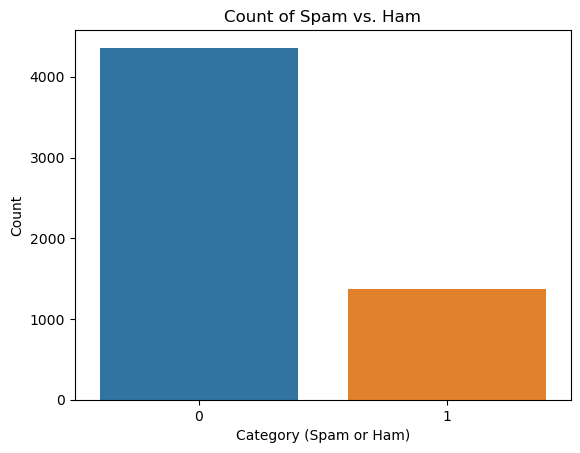

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_df is your DataFrame with a 'spam' column

# Create a count plot
sns.countplot(x='spam', data=spam_df)

# Add labels and title
plt.xlabel('Category (Spam or Ham)')
plt.ylabel('Count')
plt.title('Count of Spam vs. Ham')

# Show the plot
plt.show()


# STEP #3: COUNTVECTORIZER

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [17]:
spamham_countvectorizer=vectorizer.fit_transform(spam_df['text'])
feature_names = vectorizer.get_feature_names_out()

In [18]:
print(feature_names)

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [19]:
print(spamham_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
spamham_countvectorizer.shape

(5728, 37303)

# STEP#4: TRAINING THE MODEL

In [21]:
label=spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [26]:
testing_sample=['Free Money!!!', 'Hie Talent, please let me know if you need further information']
testing_sample_countvectorizer=vectorizer.transform(testing_sample)
test_predict=NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [27]:
x=spamham_countvectorizer
y=label

In [28]:
x.shape

(5728, 37303)

In [29]:
y.shape

(5728,)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

In [31]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

# STEP#5: EVALUATING THE MODEL (NAIVE BAYES)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train=NB_classifier.predict(x_train)
y_predict_train

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

<Axes: >

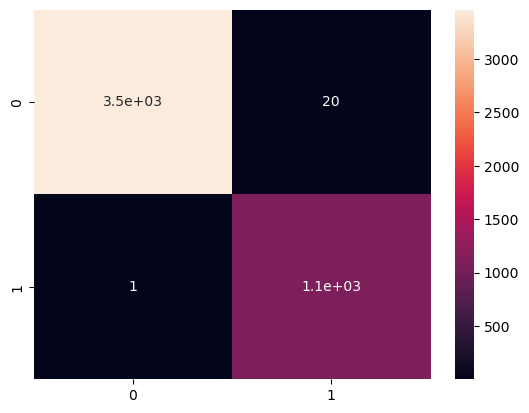

In [33]:
cm=confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

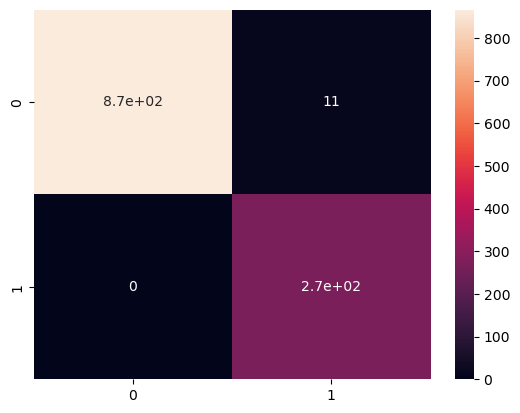

In [34]:
y_predict_test=NB_classifier.predict(x_test)
cm=confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       877
           1       0.96      1.00      0.98       269

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



# SVM EVALUATION

In [41]:
from sklearn import svm
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [42]:
y_pred = svm_classifier.predict(X_test)

In [43]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6465968586387435
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77       856
           1       0.29      0.27      0.28       290

    accuracy                           0.65      1146
   macro avg       0.52      0.52      0.52      1146
weighted avg       0.64      0.65      0.64      1146



# RANDOM FOREST EVALUATION

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Create a Random Forest classifier
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [48]:
# Train the Random Forest model
random_forest_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)

In [51]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9589877835951134
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       856
           1       1.00      0.84      0.91       290

    accuracy                           0.96      1146
   macro avg       0.97      0.92      0.94      1146
weighted avg       0.96      0.96      0.96      1146

